### M. Yogi Dwiyanto
### 221351073
### Pagi C
### kNN Algorithm

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import  train_test_split

import seaborn as sns


In [90]:
df = pd.read_csv("Pinjaman.csv")

In [91]:
df.head()

,Usia,Pendapatan,Status_Perkawinan,Jumlah_Pinjaman,Durasi_Pinjaman,Status_Pekerjaan,Lulus_Kredit
0,25,40,Belum Menikah,50,5,Karyawan Tetap,Tidak Layak
1,45,100,Menikah,80,10,Wirausaha,Layak
2,35,60,Menikah,100,15,Karyawan Kontrak,Tidak Layak
3,28,75,Belum Menikah,60,7,Karyawan Tetap,Layak
4,50,120,Menikah,150,20,Wirausaha,Layak


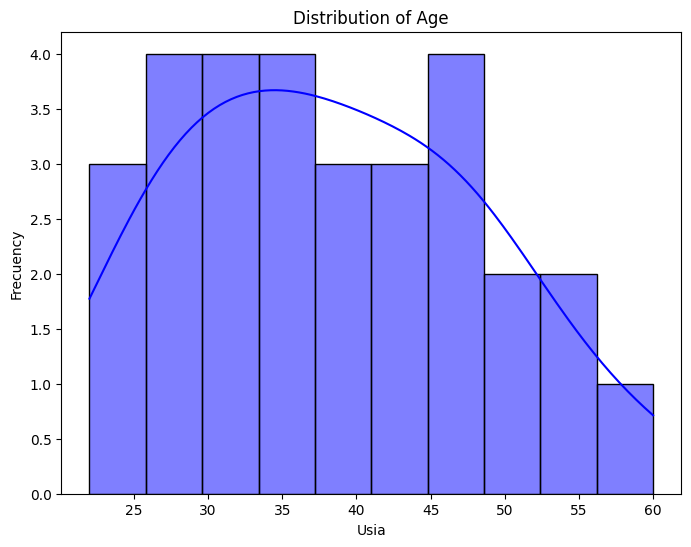

In [92]:
# Distribution of Age
plt.figure(figsize=(8,6))
sns.histplot(df['Usia'], bins=10,kde=True, color='blue')
plt.title('Distribution of Age')
plt.xlabel('Usia')
plt.ylabel('Frecuency')
plt.show()

C:\Users\MAHASISWA\AppData\Local\Temp\ipykernel_12916\4184016597.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Lulus_Kredit', y='Pendapatan', data=df, palette='Set1')


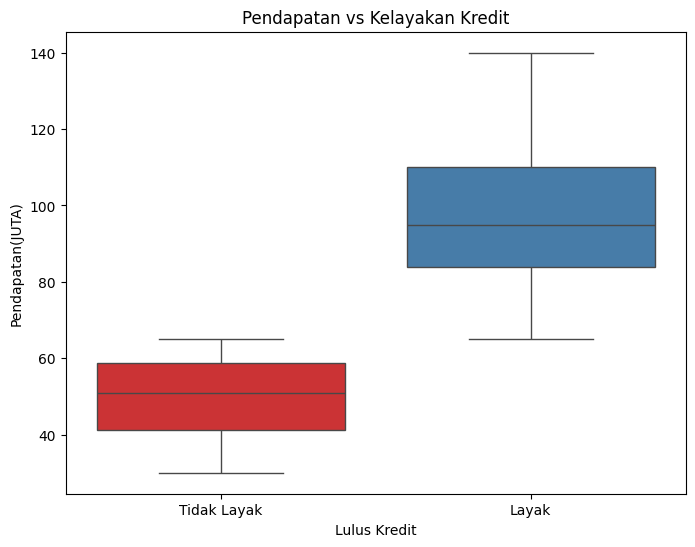

In [93]:
# Boxplot of income vs Lulus Kredit
plt.figure(figsize=(8,6))
sns.boxplot(x='Lulus_Kredit', y='Pendapatan', data=df, palette='Set1')
plt.title('Pendapatan vs Kelayakan Kredit')
plt.xlabel('Lulus Kredit')
plt.ylabel('Pendapatan(JUTA)')
plt.xticks(ticks=[0,1], labels=['Tidak Layak', 'Layak'])
plt.show()

C:\Users\MAHASISWA\AppData\Local\Temp\ipykernel_12916\4156012330.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Status_Perkawinan', data=df, palette='Set2')


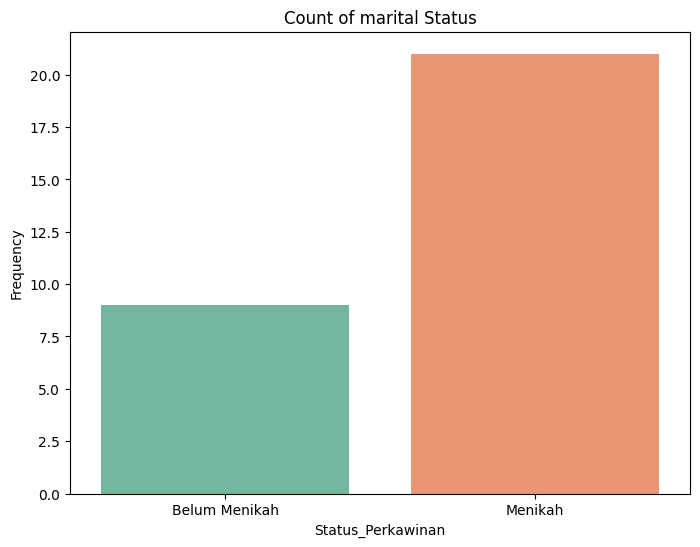

In [94]:
# CountPlot of marital status
plt.figure(figsize=(8,6))
sns.countplot(x='Status_Perkawinan', data=df, palette='Set2')
plt.title('Count of marital Status')
plt.xticks(ticks=[0,1], labels=['Belum Menikah', 'Menikah'])
plt.ylabel('Frequency')
plt.show()

<Figure size 800x600 with 0 Axes>

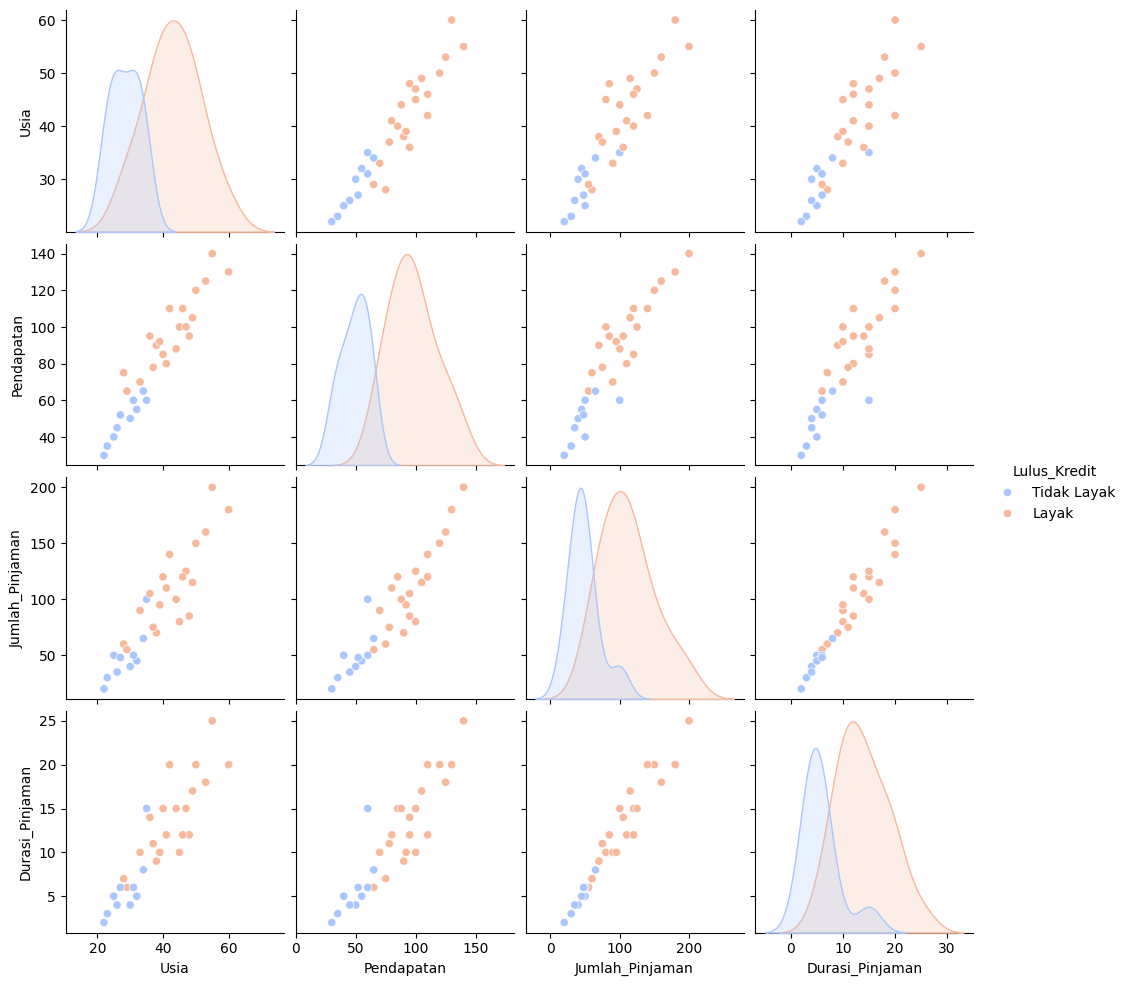

In [95]:
# Pairplot for the numerical features
plt.figure(figsize=(8,6))
sns.pairplot(df[['Usia', 'Pendapatan',
                 'Jumlah_Pinjaman',
                 'Durasi_Pinjaman',
                 'Lulus_Kredit']],
                 hue='Lulus_Kredit',palette='coolwarm')
plt.show()

C:\Users\MAHASISWA\AppData\Local\Temp\ipykernel_12916\271014065.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Lulus_Kredit',y='Jumlah_Pinjaman',data=df, palette='Set2')


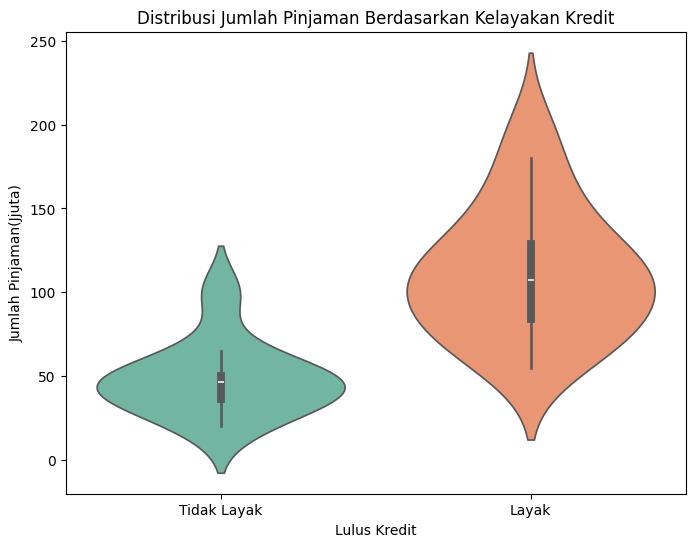

In [96]:
# Violin plot of loan amount vs Credit egibility
plt.figure(figsize=(8,6))
sns.violinplot(x='Lulus_Kredit',y='Jumlah_Pinjaman',data=df, palette='Set2')
plt.title('Distribusi Jumlah Pinjaman Berdasarkan Kelayakan Kredit')
plt.xlabel('Lulus Kredit')
plt.ylabel('Jumlah Pinjaman(Jjuta)')
plt.xticks(ticks=[0,1], labels=['Tidak Layak','Layak'])
plt.show()


In [97]:
label_encoder_status_perkawinan = LabelEncoder()
label_encoder_status_pekerjaan = LabelEncoder()
label_encoder_status_lulus_kredit = LabelEncoder()

In [98]:
df['Status_Perkawinan']= label_encoder_status_perkawinan.fit_transform(df['Status_Perkawinan'])
df['Status_Pekerjaan']= label_encoder_status_pekerjaan.fit_transform(df['Status_Pekerjaan'])
df['Lulus_Kredit']= label_encoder_status_lulus_kredit.fit_transform(df['Lulus_Kredit'])

In [99]:
df.to_csv('Pinjaman_modif.csv', index=False)

In [100]:
# Splitting the dataset into features and labels
X = df.drop(columns=['Lulus_Kredit'])
y = df['Lulus_Kredit']

In [101]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [102]:
# Creating and Training the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [103]:
# Predicting the test data
y_pred = knn_model.predict(X_test)

In [104]:
# Example :
# Usia = 30
# Pendapatan = 80
# Status Perkawinan = 0
# Jumlah Pinjaman = 70
# Durasi = 10
# Status Pekerjaan = 1

new_data = np.array([[30,80,0,70,10,1]])
new_pred = knn_model.predict(new_data)

c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [110]:
print('Hasil Prediksi', new_pred)

Hasil Prediksi [0]


In [109]:
label_encoder_status_lulus_kredit.inverse_transform(new_pred)

array(['Layak'], dtype=object)

In [107]:
# Calculating the accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0

In [108]:
# Menyimpan model 
import pickle

filename ='knn_pinjam_mod.pkl'
pickle.dump(knn_model, open(filename, 'wb'))